Reference: https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission

Data Preparation & Exploration

In [1]:
#Loading libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [2]:
data_path = 'Dataset/diabetic_preprocessed.csv'
train_data_path = 'Dataset/diabetic_preprocessed_train.csv'
test_data_path = 'Dataset/diabetic_preprocessed_test.csv'

In [3]:
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [4]:
len(df_train), len(df_test)

(15898, 50881)

In [5]:
df = pd.read_csv(data_path)

In [6]:
df[:5].T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,30 years or younger,30 years or younger,30 years or younger,30-60 years,30-60 years
discharge_disposition_id,Other,Discharged to Home,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Referral,Emergency,Emergency,Emergency,Emergency
time_in_hospital,1,3,2,2,1
medical_specialty,Other,Missing,Missing,Missing,Missing
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [7]:
df.shape, df.columns

((101766, 25),
 Index(['race', 'gender', 'age', 'discharge_disposition_id',
        'admission_source_id', 'time_in_hospital', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications',
        'primary_diagnosis', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
        'insulin', 'change', 'diabetesMed', 'medicare', 'medicaid',
        'had_emergency', 'had_inpatient_days', 'had_outpatient_days',
        'readmitted', 'readmit_binary', 'readmit_30_days'],
       dtype='object'))

In [8]:
df.dtypes

race                        object
gender                      object
age                         object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
primary_diagnosis           object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
insulin                     object
change                      object
diabetesMed                 object
medicare                      bool
medicaid                      bool
had_emergency                 bool
had_inpatient_days            bool
had_outpatient_days           bool
readmitted                  object
readmit_binary               int64
readmit_30_days              int64
dtype: object

In [9]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
discharge_disposition_id 0
admission_source_id 0
medical_specialty 0
primary_diagnosis 0
max_glu_serum 0
A1Cresult 0
insulin 0
change 0
diabetesMed 0
readmitted 0


Which means no missing values.

In [10]:
for col in df.columns:
    if df[col].dtype != bool:
        print(df[col].value_counts())
        print('\n')

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


age
Over 60 years          68541
30-60 years            30716
30 years or younger     2509
Name: count, dtype: int64


discharge_disposition_id
Discharged to Home    60234
Other                 41532
Name: count, dtype: int64


admission_source_id
Emergency    57494
Referral     30856
Other        13416
Name: count, dtype: int64


time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


medical_specialty
Missing                   49949
Other                     16825
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralP

In [11]:
pprint.pprint((df['gender'].value_counts(), df['age'].value_counts(), df['race'].value_counts()))


(gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64,
 age
Over 60 years          68541
30-60 years            30716
30 years or younger     2509
Name: count, dtype: int64,
 race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64)


In [12]:
df['readmit_30_days'].value_counts(), df['readmitted'].value_counts(), df['readmit_binary'].value_counts()

(readmit_30_days
 0    90409
 1    11357
 Name: count, dtype: int64,
 readmitted
 NO     54864
 >30    35545
 <30    11357
 Name: count, dtype: int64,
 readmit_binary
 0    54864
 1    46902
 Name: count, dtype: int64)

Data Visualization

Text(0.5, 1.0, 'Distribution of Readmission within 30 days')

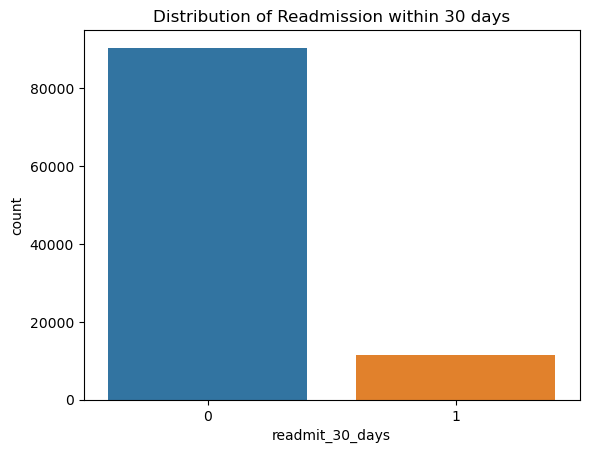

In [13]:
# Visualize distribution using a histogram
sns.countplot(data=df, x='readmit_30_days').set_title('Distribution of Readmission within 30 days')

Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

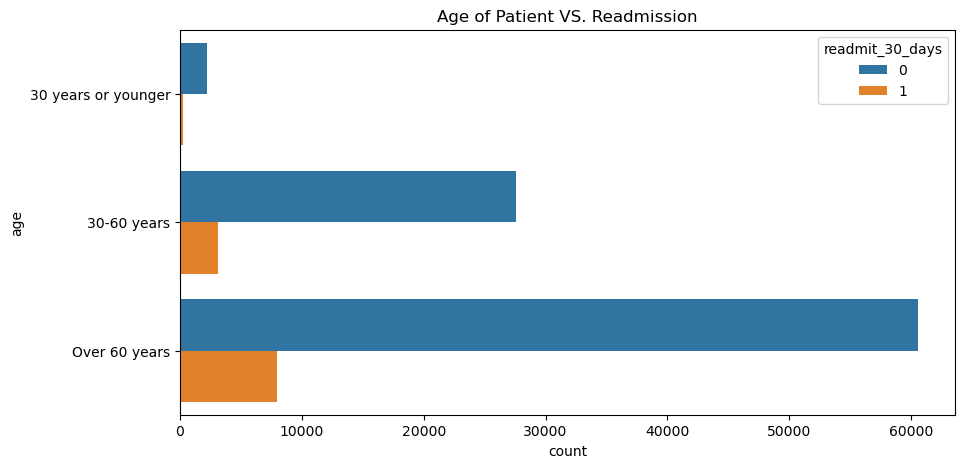

In [14]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y= df['age'], hue = df['readmit_30_days']).set_title('Age of Patient VS. Readmission')

Race and Readmission

<Axes: xlabel='count', ylabel='race'>

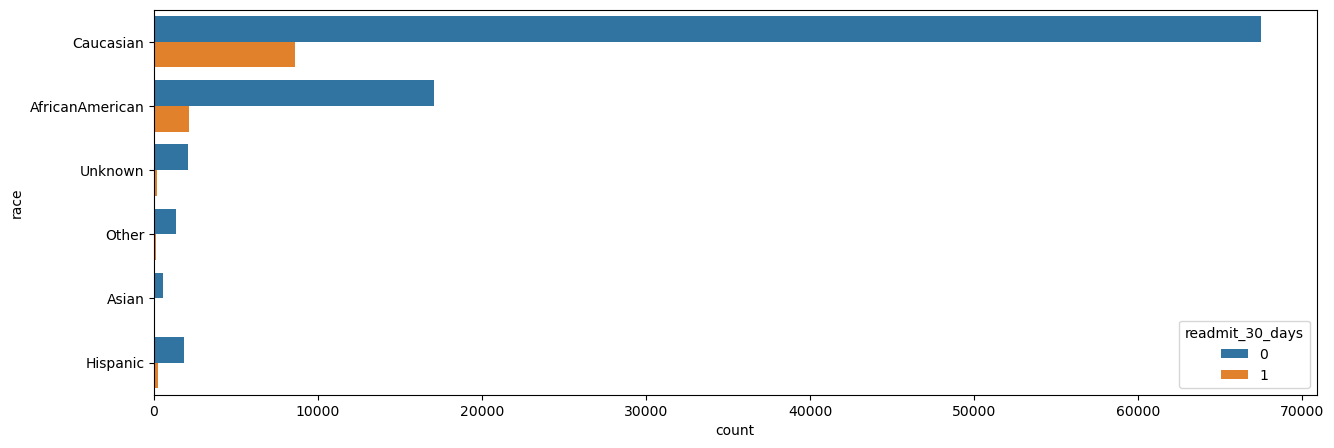

In [15]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y = df['race'], hue = df['readmit_30_days'])


Gender and Readmission¶

    Male = 1
    Female = 0



Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

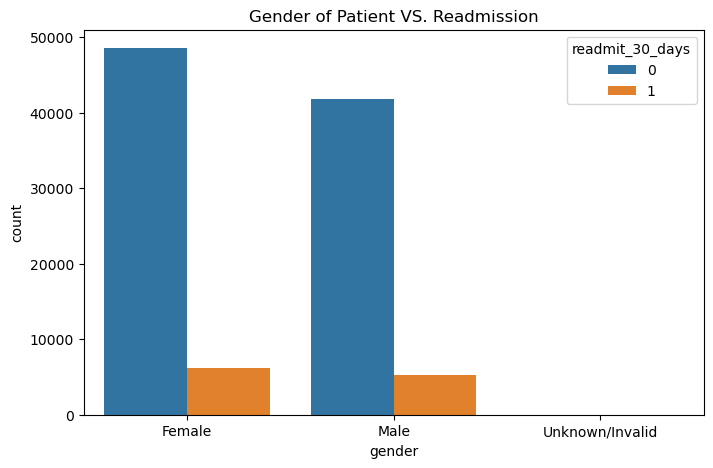

In [16]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x=df['gender'], hue = df['readmit_30_days']).set_title("Gender of Patient VS. Readmission")

### Pre-Modeling Data Preprocessing


In [17]:
df_train.head().T

,0,1,2,3,4
race,Caucasian,Other,Caucasian,Caucasian,Caucasian
gender,Male,Male,Male,Female,Male
age,30-60 years,Over 60 years,30-60 years,30 years or younger,Over 60 years
discharge_disposition_id,Other,Other,Discharged to Home,Discharged to Home,Discharged to Home
admission_source_id,Emergency,Referral,Emergency,Emergency,Emergency
time_in_hospital,3,9,5,7,3
medical_specialty,Missing,InternalMedicine,Missing,Missing,InternalMedicine
num_lab_procedures,50,50,45,69,43
num_procedures,0,1,0,0,0
num_medications,12,15,23,20,14


age

In [18]:
df_train.age.value_counts()

age
Over 60 years          10858
30-60 years             4617
30 years or younger      423
Name: count, dtype: int64

In [19]:
age_dict = {'30 years or younger': 1, '30-60 years': 2, 'Over 60 years': 3}
df_train['age'] = df_train.age.map(age_dict)
df_test['age'] = df_test.age.map(age_dict)

In [20]:
df_train['age'].dtype

dtype('int64')

admission_source_id

In [21]:
df_train.admission_source_id.value_counts()

admission_source_id
Emergency    9256
Referral     4649
Other        1993
Name: count, dtype: int64

In [22]:
dum = pd.get_dummies(df_train['admission_source_id'], prefix='admission_source')
dum.head()

,admission_source_Emergency,admission_source_Other,admission_source_Referral
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,True,False,False


In [23]:
df_train.drop('admission_source_id', axis=1, inplace=True)
df_train = pd.concat([df_train, dum], axis=1)

df_test = pd.concat([df_test, pd.get_dummies(df_test['admission_source_id'], prefix='admission_source')], axis=1)
df_test.drop('admission_source_id', axis=1, inplace=True)

In [24]:
df_test.head().T

,0,1,2,3,4
race,AfricanAmerican,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,Male,Female,Male,Male,Male
age,2,2,3,3,3
discharge_disposition_id,Discharged to Home,Discharged to Home,Other,Discharged to Home,Other
time_in_hospital,2,1,8,4,3
medical_specialty,InternalMedicine,Emergency/Trauma,Missing,Family/GeneralPractice,Missing
num_lab_procedures,72,43,46,77,28
num_procedures,0,0,1,0,0
num_medications,7,4,15,7,19
primary_diagnosis,Diabetes,Respiratory Issues,Other,Genitourinary Issues,Respiratory Issues


medical_specialty

In [25]:
df_train.medical_specialty.value_counts()

medical_specialty
Missing                   7981
Other                     2533
InternalMedicine          2258
Family/GeneralPractice    1202
Emergency/Trauma          1196
Cardiology                 728
Name: count, dtype: int64

In [26]:
#dropping columns with large number of missing values
df_train = df_train.drop(['medical_specialty'], axis = 1)
df_test = df_test.drop(['medical_specialty'], axis = 1)

primary_diagnosis

In [27]:
df_train.primary_diagnosis.value_counts()

primary_diagnosis
Other                     10803
Respiratory Issues         2120
Diabetes                   1521
Genitourinary Issues        781
Musculoskeletal Issues      673
Name: count, dtype: int64

In [28]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['primary_diagnosis'], prefix='primary_diagnosis')], axis=1)
df_train.drop('primary_diagnosis', axis=1, inplace=True)

df_test = pd.concat([df_test, pd.get_dummies(df_test['primary_diagnosis'], prefix='primary_diagnosis')], axis=1)
df_test.drop('primary_diagnosis', axis=1, inplace=True)

gender

In [29]:
df_train.gender.value_counts(), df_test.gender.value_counts()

(gender
 Female    8594
 Male      7304
 Name: count, dtype: int64,
 gender
 Female    27303
 Male      23578
 Name: count, dtype: int64)

In [30]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['gender'], prefix='gender' )], axis=1)
df_train.drop('gender', axis=1, inplace=True)

df_test = pd.concat([df_test, pd.get_dummies(df_test['gender'], prefix='gender' )], axis=1)
df_test.drop('gender', axis=1, inplace=True)

insulin

In [31]:
df_train.insulin.value_counts()

insulin
No        7060
Steady    4762
Down      2185
Up        1891
Name: count, dtype: int64

In [32]:
insulin_map = {'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1} # whether insulin is used
insulin_change_map = {'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1} # the change in insulin

In [33]:
df_train['insulin_change'] = df_train['insulin'].map(insulin_change_map)
df_train['insulin'] = df_train['insulin'].map(insulin_map)
df_test['insulin_change'] = df_test['insulin'].map(insulin_change_map)
df_test['insulin'] = df_test['insulin'].map(insulin_map)

In [34]:
df_train.insulin.value_counts(), df_train.insulin_change.value_counts()

(insulin
 1    8838
 0    7060
 Name: count, dtype: int64,
 insulin_change
 0    11822
 1     4076
 Name: count, dtype: int64)

change

In [35]:
df_train.change.value_counts(),

(change
 No    8332
 Ch    7566
 Name: count, dtype: int64,)

In [36]:
change_dict = {'No': 0, 'Ch': 1}
df_train['change'] = df_train.change.map(change_dict)
df_train['change'].value_counts()

df_test['change'] = df_test.change.map(change_dict)
df_test['change'].value_counts()

change
0    27281
1    23600
Name: count, dtype: int64

diabetesMed

In [37]:
df_train.diabetesMed.value_counts()

diabetesMed
Yes    12432
No      3466
Name: count, dtype: int64

In [38]:
dia_dict = {'No': 0, 'Yes': 1}
df_train['diabetesMed'] = df_train.diabetesMed.map(dia_dict)
df_train['diabetesMed'].value_counts()

df_test['diabetesMed'] = df_test.diabetesMed.map(dia_dict)
df_test['diabetesMed'].value_counts()

diabetesMed
1    39197
0    11684
Name: count, dtype: int64

max_glu_serum, A1Cresult

Reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested

In [39]:
df_train.max_glu_serum.value_counts(), df['A1Cresult'].value_counts()

(max_glu_serum
 Norm    397
 >200    246
 >300    221
 Name: count, dtype: int64,
 A1Cresult
 >8      8216
 Norm    4990
 >7      3812
 Name: count, dtype: int64)

In [40]:
df_train.max_glu_serum.isna().sum(), df_train.A1Cresult.isna().sum()

(15034, 13292)

In [41]:
df_train.fillna('None', inplace=True)
df_test.fillna('None', inplace=True)

In [42]:
df_train['A1Cresult'] = df_train['A1Cresult'].replace('>7', 1)
df_train['A1Cresult'] = df_train['A1Cresult'].replace('>8', 1)
df_train['A1Cresult'] = df_train['A1Cresult'].replace('Norm', 0)
df_train['A1Cresult'] = df_train['A1Cresult'].replace('None', -99)
df_train['max_glu_serum'] = df_train['max_glu_serum'].replace('>200', 1)
df_train['max_glu_serum'] = df_train['max_glu_serum'].replace('>300', 1)
df_train['max_glu_serum'] = df_train['max_glu_serum'].replace('Norm', 0)
df_train['max_glu_serum'] = df_train['max_glu_serum'].replace('None', -99)

df_test['A1Cresult'] = df_test['A1Cresult'].replace('>7', 1)
df_test['A1Cresult'] = df_test['A1Cresult'].replace('>8', 1)
df_test['A1Cresult'] = df_test['A1Cresult'].replace('Norm', 0)
df_test['A1Cresult'] = df_test['A1Cresult'].replace('None', -99)
df_test['max_glu_serum'] = df_test['max_glu_serum'].replace('>200', 1)
df_test['max_glu_serum'] = df_test['max_glu_serum'].replace('>300', 1)
df_test['max_glu_serum'] = df_test['max_glu_serum'].replace('Norm', 0)
df_test['max_glu_serum'] = df_test['max_glu_serum'].replace('None', -99)

In [43]:
df_train['max_glu_serum'].value_counts(), df_train['A1Cresult'].value_counts()

(max_glu_serum
 -99    15034
  1       467
  0       397
 Name: count, dtype: int64,
 A1Cresult
 -99    13292
  1      1841
  0       765
 Name: count, dtype: int64)

In [44]:
df_train.head().T

,0,1,2,3,4
race,Caucasian,Other,Caucasian,Caucasian,Caucasian
age,2,3,2,1,3
discharge_disposition_id,Other,Other,Discharged to Home,Discharged to Home,Discharged to Home
time_in_hospital,3,9,5,7,3
num_lab_procedures,50,50,45,69,43
num_procedures,0,1,0,0,0
num_medications,12,15,23,20,14
number_diagnoses,7,7,7,8,6
max_glu_serum,-99,-99,-99,-99,-99
A1Cresult,-99,-99,-99,-99,-99


### Train


take Y = `<readmit_30_days>` and X the rest of the features other than `<race, discharge_disposition_id, readmitted, readmit_binary, readmit_30_days>`

In [45]:
exclude = ['readmit_30_days', 'readmitted', 'readmit_binary', 'race', 'discharge_disposition_id']

In [46]:
Y_train = df_train['readmit_30_days']
X_train = df_train.drop(exclude, axis=1)

Y_test = df_test['readmit_30_days']
X_test = df_test.drop(exclude, axis=1)

In [47]:
X_train.head().T

,0,1,2,3,4
age,2,3,2,1,3
time_in_hospital,3,9,5,7,3
num_lab_procedures,50,50,45,69,43
num_procedures,0,1,0,0,0
num_medications,12,15,23,20,14
number_diagnoses,7,7,7,8,6
max_glu_serum,-99,-99,-99,-99,-99
A1Cresult,-99,-99,-99,-99,-99
insulin,1,0,1,1,0
change,1,1,1,1,0


In [48]:
Y_train.sum(), len(Y_train), Y_test.sum(), len(Y_test)

(7949, 15898, 5608, 50881)

#### logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression(solver = "liblinear", class_weight="balanced",random_state = 42).fit(X_train, Y_train)
model.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [51]:
Y_pred = model.predict(X_test)

In [52]:
Y_pred[:10], Y_test[:10]

(array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1]),
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    0
 Name: readmit_30_days, dtype: int64)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, Y_pred)))
print("Precision is {0:.2f}".format(precision_score(Y_test, Y_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, Y_pred)))

Accuracy is 0.63
Precision is 0.16
Recall is 0.54


### Saving Result 

In [54]:
res = pd.read_csv(test_data_path)

In [55]:
len(res), len(Y_pred)

(50881, 50881)

In [56]:
res = pd.concat([res, pd.DataFrame(Y_pred, columns=['predicted'])], axis=1)

In [57]:
res[:3]

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted,readmit_binary,readmit_30_days,predicted
0,AfricanAmerican,Male,30-60 years,Discharged to Home,Emergency,2,InternalMedicine,72,0,7,...,Yes,False,False,False,False,False,>30,1,0,0
1,Caucasian,Female,30-60 years,Discharged to Home,Referral,1,Emergency/Trauma,43,0,4,...,Yes,False,False,False,False,False,NO,0,0,0
2,Caucasian,Male,Over 60 years,Other,Emergency,8,Missing,46,1,15,...,Yes,True,False,False,True,False,NO,0,0,1


In [58]:
df_test[:3]

,race,age,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,...,admission_source_Other,admission_source_Referral,primary_diagnosis_Diabetes,primary_diagnosis_Genitourinary Issues,primary_diagnosis_Musculoskeletal Issues,primary_diagnosis_Other,primary_diagnosis_Respiratory Issues,gender_Female,gender_Male,insulin_change
0,AfricanAmerican,2,Discharged to Home,2,72,0,7,5,-99,1,...,False,False,True,False,False,False,False,False,True,0
1,Caucasian,2,Discharged to Home,1,43,0,4,5,-99,0,...,False,True,False,False,False,False,True,True,False,0
2,Caucasian,3,Other,8,46,1,15,7,-99,-99,...,False,False,False,False,False,True,False,False,True,1


In [59]:
res.to_csv('Dataset/result.csv', index=False)

In [60]:
df_train.to_csv('Dataset/train.csv', index=False)
df_test.to_csv('Dataset/test.csv', index=False)